In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255
test_images = test_images / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72906 (284.79 KB)
Trainable params: 72906 (284.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 38s 59ms/step - loss: 1.5735 - accuracy: 0.4479 - val_loss: 1.3827 - val_accuracy: 0.5201
Epoch 2/10
625/625 [==============================] - 29s 47ms/step - loss: 1.2841 - accuracy: 0.5534 - val_loss: 1.2551 - val_accuracy: 0.5750
Epoch 3/10
625/625 [==============================] - 26s 42ms/step - loss: 1.1754 - accuracy: 0.5915 - val_loss: 1.1998 - val_accuracy: 0.5849
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 1.1064 - accuracy: 0.6172 - val_loss: 1.1968 - val_accuracy: 0.5828
Epoch 5/10
625/625 [==============================] - 26s 41ms/step - loss: 1.0560 - accuracy: 0.6360 - val_loss: 1.1761 - val_accuracy: 0.5921
Epoch 6/10
625/625 [==============================] - 27s 44ms/step - loss: 1.0109 - accuracy: 0.6511 - val_loss: 1.1252 - val_accuracy: 0.6121
Epoch 7/10
625/625 [==============================] - 26s 42ms/step - loss: 0.9708 - accuracy: 0.6658 - val_loss: 1.1385 - val_accuracy:

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(test_images[:10])

313/313 [==============================] - 2s 7ms/step - loss: 1.0841 - accuracy: 0.6298
Test accuracy: 0.629800021648407
1/1 [==============================] - 0s 87ms/step


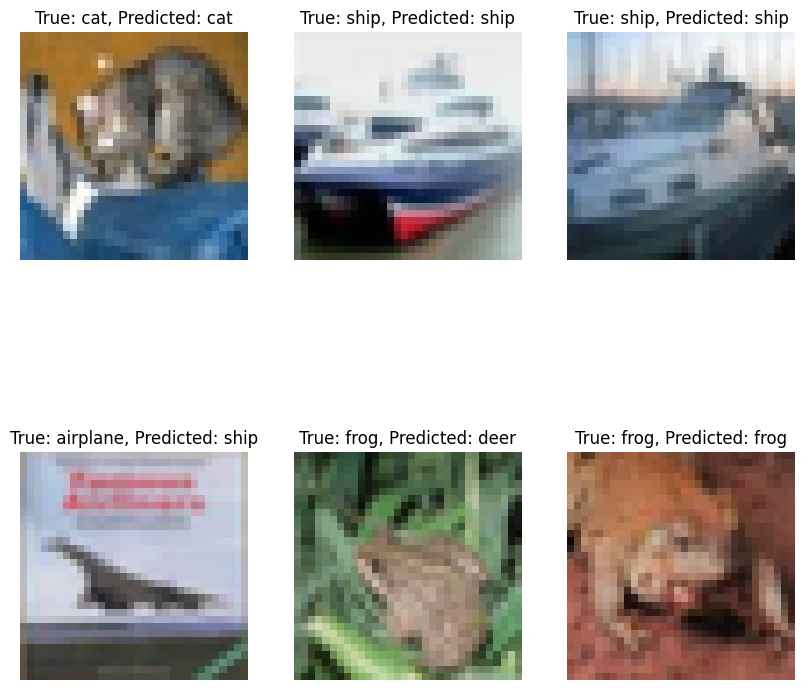

In [7]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the predictions
plt.figure(figsize=(10,10))
for i in range(min(6, len(test_labels))):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i], interpolation='nearest')
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}, Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()